Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [193]:
import pandas as pd
import numpy as np
import seaborn as sn
import statsmodels.formula.api as smf


In [194]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups (1).csv to 50_Startups (1) (2).csv


In [195]:
startup=pd.read_csv("50_Startups (1).csv")

In [196]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [197]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [198]:
startup.corr()
#R&D Spend and Marketing Spend are more important than Administration
#R&D Spend and Marketing Spend are 72% dependent on each other. i.e colinear

<ipython-input-198-961a55118216>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [199]:
startup.rename(columns={'R&D Spend':'RD', 'Marketing Spend': 'Marketing'}, inplace=True)

In [200]:
startup.duplicated().sum()

0

In [201]:
startup.head(2)

,RD,Administration,Marketing,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


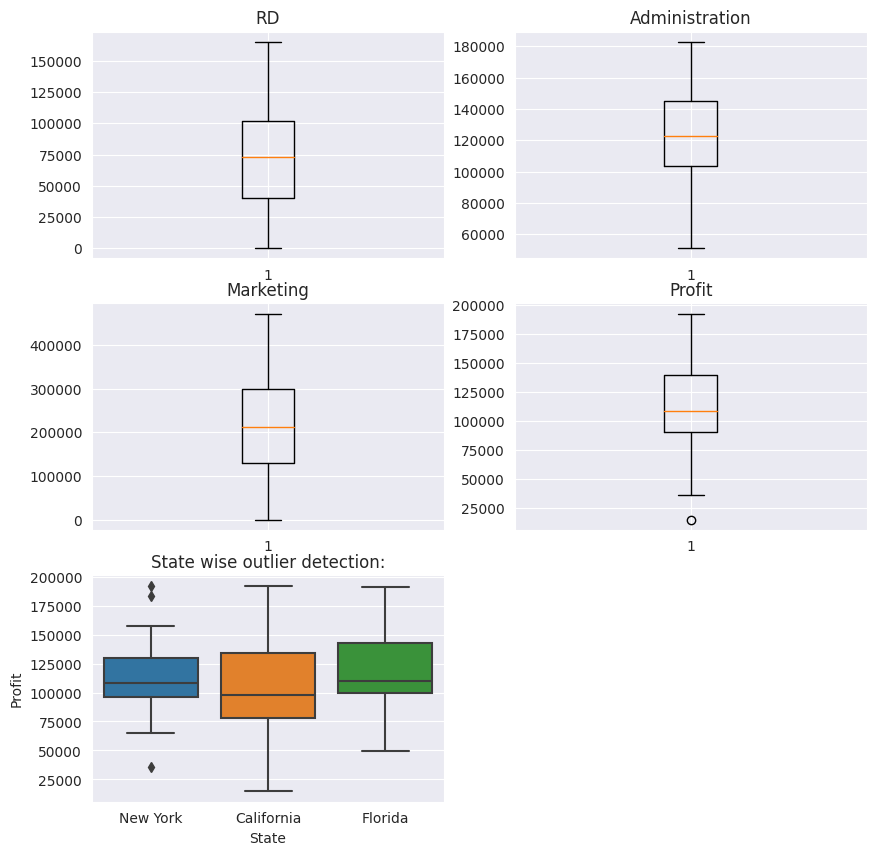

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
box=plt.boxplot(startup.RD)
plt.title("RD")


plt.subplot(3,2,2)
box=plt.boxplot(startup.Administration)
plt.title("Administration")


plt.subplot(3,2,3)
box=plt.boxplot(startup.Marketing)
plt.title("Marketing")


plt.subplot(3,2,4)
box=plt.boxplot(startup.Profit)
plt.title("Profit")

#State wise outlier detection:
plt.subplot(3,2,5)
sns.boxplot(x='State', y='Profit', data=startup)
plt.title("State wise outlier detection:")
plt.show()


#from the boxplot we can see that there is an outlier in profit
#Outliers are present in New york state


CHECKNG FOR CO-LINEARITY

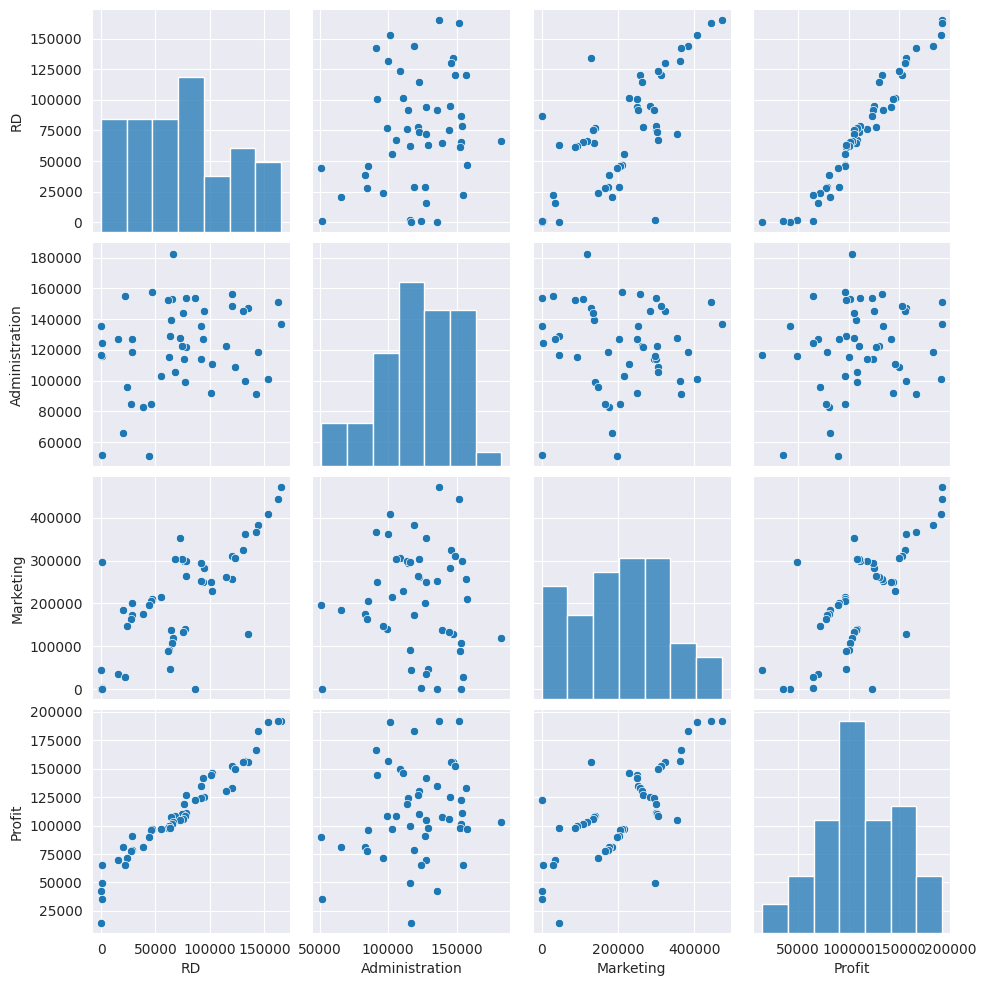

In [203]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(startup)

#VIF


In [204]:


rsq_RD=smf.ols('RD~Administration+Marketing', data=startup).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_Admin=smf.ols('Administration~RD+Marketing', data=startup).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_Marketing=smf.ols('Marketing~RD+Administration', data=startup).fit().rsquared
vif_Marketing=1/(1-rsq_Marketing)

#store vif in dataframe
d1={'Variables':['RD','Administration','Marketing'], 'VIF':[vif_RD,vif_Admin,vif_Marketing]}
dataframe=pd.DataFrame(d1)
dataframe


#we will consider VIF threshold as 10, all the VIF values are less than 10, hence there is no colinearity


,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


BUILD MODEL

In [205]:

import statsmodels.formula.api as smf
model=smf.ols('Profit ~ RD+Administration+Marketing', data=startup).fit()

In [206]:
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [207]:
print('T values------------ ''\n',model.tvalues, '\n', 'P values--------------','\n', model.pvalues)
#If we see the P values
#H0---->y not dependent on X
#HA----> y is dependent on x
#alpha=0.05
#P<alpha ---->Accept Alternate Hypothesis
#For a good model, HA should be true.

T values------------ 
 Intercept          7.626218
RD                17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 P values-------------- 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [208]:
#R squared values
(model.rsquared,model.rsquared_adj)

#Accuracy of our model is good.

(0.9507459940683246, 0.9475337762901719)

In [209]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.948     
Dependent Variable:    Profit            AIC:                 1058.7715 
Date:                  2023-07-03 17:12  BIC:                 1066.4196 
No. Observations:      50                Log-Likelihood:      -525.39   
Df Model:              3                 F-statistic:         296.0     
Df Residuals:          46                Prob (F-statistic):  4.53e-30  
R-squared:             0.951             Scale:               8.5236e+07
------------------------------------------------------------------------
                 Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------------
Intercept      50122.1930 6572.3526  7.6262 0.0000 36892.7333 63351.6526
RD                 0.8057    0.0451 17.8464 0.0000     0.7148     0.8966
Administration    -0.0268    0.0510 -0.5255 0.6018    -0.1295     0.0759
Marketing          0.0272    0.0165  1.6551 0.1047    -0.0059     0.0603
------------------------------------------------------------------------
Omnibus:                14.838         Durbin-Watson:            1.282  
Prob(Omnibus):          0.001          Jarque-Bera (JB):         21.442 
Skew:                   -0.949         Prob(JB):                 0.000  
Kurtosis:               5.586          Condition No.:            1402132
========================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [210]:
new_data=pd.DataFrame({'RD':165444,"Administration":90000,"Marketing":300000},index=[1])

In [211]:
model.predict(new_data)

1    189177.895993
dtype: float64

In [333]:
#RIDGE


In [ ]:
from sklearn.linear_model import Ridge

In [336]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

startup['State']= label_encoder.fit_transform(startup['State'])

startup['State'].unique()

array([2, 0, 1])

In [334]:
startup.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [432]:
X=startup.iloc[:,0:4]
Y=startup.iloc[:,4]

In [433]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,  Y_train.shape, Y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [434]:
from sklearn.linear_model import LinearRegression

# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - Y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_.reshape(-1))
print(lreg_coefficient)


Mean squared Error on test set :  9.921954098590813
          Columns  Coefficient Estimate
0              RD              0.000301
1  Administration             -0.000011
2       Marketing              0.000005
3           State             -0.326036


In [435]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
clf=Ridge()
param_grid=[{'alpha':[5,10,15]}]
gsv=GridSearchCV(clf,param_grid, cv=5, verbose=300)
gsv.fit(X_train, Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START alpha=5.....................................................
[CV 1/5; 1/3] END ......................alpha=5;, score=0.946 total time=   0.0s
[CV 2/5; 1/3] START alpha=5.....................................................
[CV 2/5; 1/3] END ......................alpha=5;, score=0.938 total time=   0.0s
[CV 3/5; 1/3] START alpha=5.....................................................
[CV 3/5; 1/3] END ......................alpha=5;, score=0.947 total time=   0.0s
[CV 4/5; 1/3] START alpha=5.....................................................
[CV 4/5; 1/3] END ......................alpha=5;, score=0.949 total time=   0.0s
[CV 5/5; 1/3] START alpha=5.....................................................
[CV 5/5; 1/3] END ......................alpha=5;, score=0.972 total time=   0.0s
[CV 1/5; 2/3] START alpha=10....................................................
[CV 1/5; 2/3] END .....................alpha=10;,

GridSearchCV(cv=5, estimator=Ridge(), param_grid=[{'alpha': [5, 10, 15]}],
             verbose=300)

In [436]:
gsv.best_params_, gsv.best_score_

({'alpha': 15}, 0.9513885910731659)

In [437]:
from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=15)
ridgeR.fit(X_train,Y_train)

Ridge(alpha=15)

In [438]:
y_pred_test=ridgeR.predict(X_test)
y_pred_train=ridgeR.predict(X_train)

#let us calculate MSE
mse_ridge_test=np.mean((y_pred_test-Y_test)**2)
mse_ridge_train=np.mean((y_pred_train-Y_train)**2)
print('Test error:  ', mse_ridge_test)
print('Train error: ', mse_ridge_train)

Test error:   9.772330603734888
Train error:  8.082824418051583


In [439]:
rige_coefficients=pd.DataFrame()
rige_coefficients['columns']=X_train.columns
rige_coefficients['Coefficient Estimate']=pd.Series(ridgeR.coef_.reshape(-1))

print(rige_coefficients)

          columns  Coefficient Estimate
0              RD              0.000301
1  Administration             -0.000011
2       Marketing              0.000005
3           State             -0.203504


In [440]:
#if we observe in the beta values, the beta value for state has shrunk

LASSO

In [441]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, Y_train)
y_pred1_test = lasso.predict(X_test)
y_pred1_train= lasso.predict(X_train)



In [442]:
# calculate mean square error
mean_squared_error_lasso = np.mean((y_pred1_test - Y_test)**2)
print(mean_squared_error_lasso)

9.585977253751187


In [443]:
lasso_coefficients=pd.DataFrame()
lasso_coefficients['columns']=X_train.columns
lasso_coefficients['Coefficient Estimate']=pd.Series(lasso.coef_.reshape(-1))

print(lasso_coefficients)

          columns  Coefficient Estimate
0              RD              0.000301
1  Administration             -0.000011
2       Marketing              0.000005
3           State             -0.000000


In [444]:
#Here the beta value of the state has been zero, in normal Linear regression it told beta value is important, but in lasso it says state is not important

ElasticNet

In [445]:

# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .4,l1_ratio=.5)
e_net.fit(X_train, Y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
y_pred_elastc_train=e_net.predict(X_train)


In [446]:
mean_squared_error = np.mean((y_pred_elastic - Y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 9.588716480219059


,Columns,Coefficient Estimate
0,RD,0.000301
1,Administration,-0.000011
2,Marketing,0.000005
3,State,-0.003715


In [447]:
#in Elastic net the beta value for state is reduced complared to others an there is not much change in the other beta values

2. Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [212]:
import pandas as pd
from pandas import read_csv


In [213]:
series = read_csv('ToyotaCorolla.csv', encoding='latin-1')
series.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [214]:
series.drop(['Id','Model', 'Mfg_Month','Mfg_Year', 'Fuel_Type','Color', 'Met_Color', 'Automatic', 'Cylinders'], axis=1, inplace=True)

In [215]:
series.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,46986,90,2000,3,5,210,1165,0,...,1,1,1,0,0,0,1,0,0,0


In [216]:
data=series.iloc[:,:9]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [218]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [219]:
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [220]:
data1=data.drop_duplicates().reset_index(drop=True)

In [221]:
data1.duplicated().sum()

0

In [222]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Text(0.5, 1.0, 'Weight')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


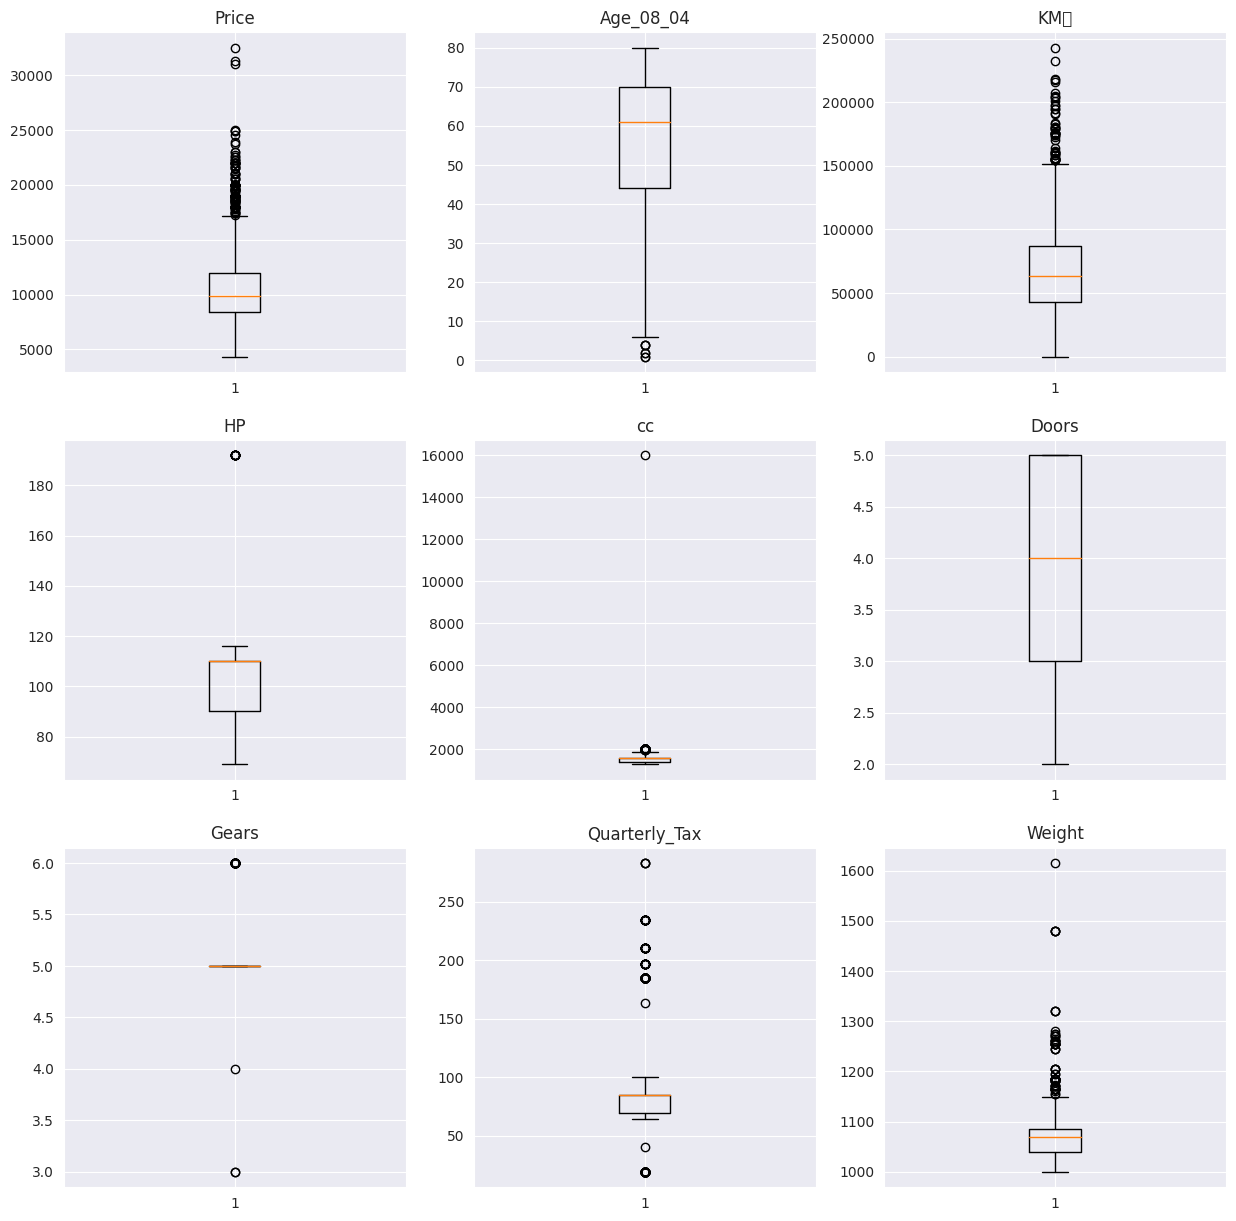

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
box=plt.boxplot(data.Price)
plt.title("Price")


plt.subplot(3,3,2)
box1=plt.boxplot(data.Age_08_04)
plt.title("Age_08_04")

plt.subplot(3,3,3)
box2=plt.boxplot(data.KM	)
plt.title("KM	")

plt.subplot(3,3,4)
box3=plt.boxplot(data.HP	)
plt.title("HP")

plt.subplot(3,3,5)
box4=plt.boxplot(data.cc	)
plt.title("cc")

plt.subplot(3,3,6)
box5=plt.boxplot(data.Doors	)
plt.title("Doors")

plt.subplot(3,3,7)
box6=plt.boxplot(data.Gears	)
plt.title("Gears")


plt.subplot(3,3,8)
box7=plt.boxplot(data.Quarterly_Tax	)
plt.title("Quarterly_Tax")


plt.subplot(3,3,9)
box8=plt.boxplot(data.Weight	)
plt.title("Weight")

<Axes: >

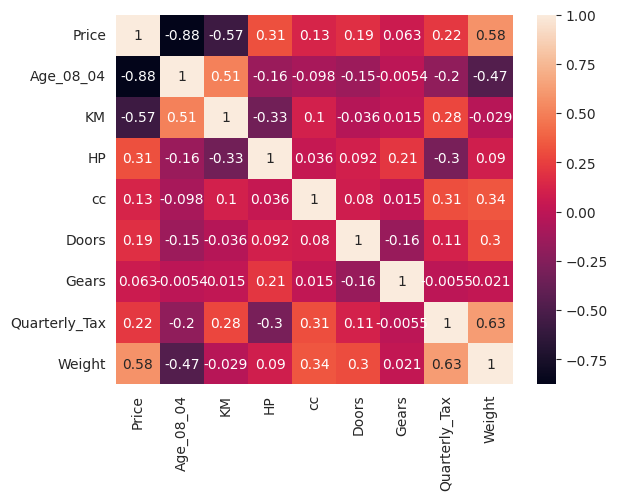

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=data.corr(), annot=True)

<Figure size 2000x2000 with 0 Axes>

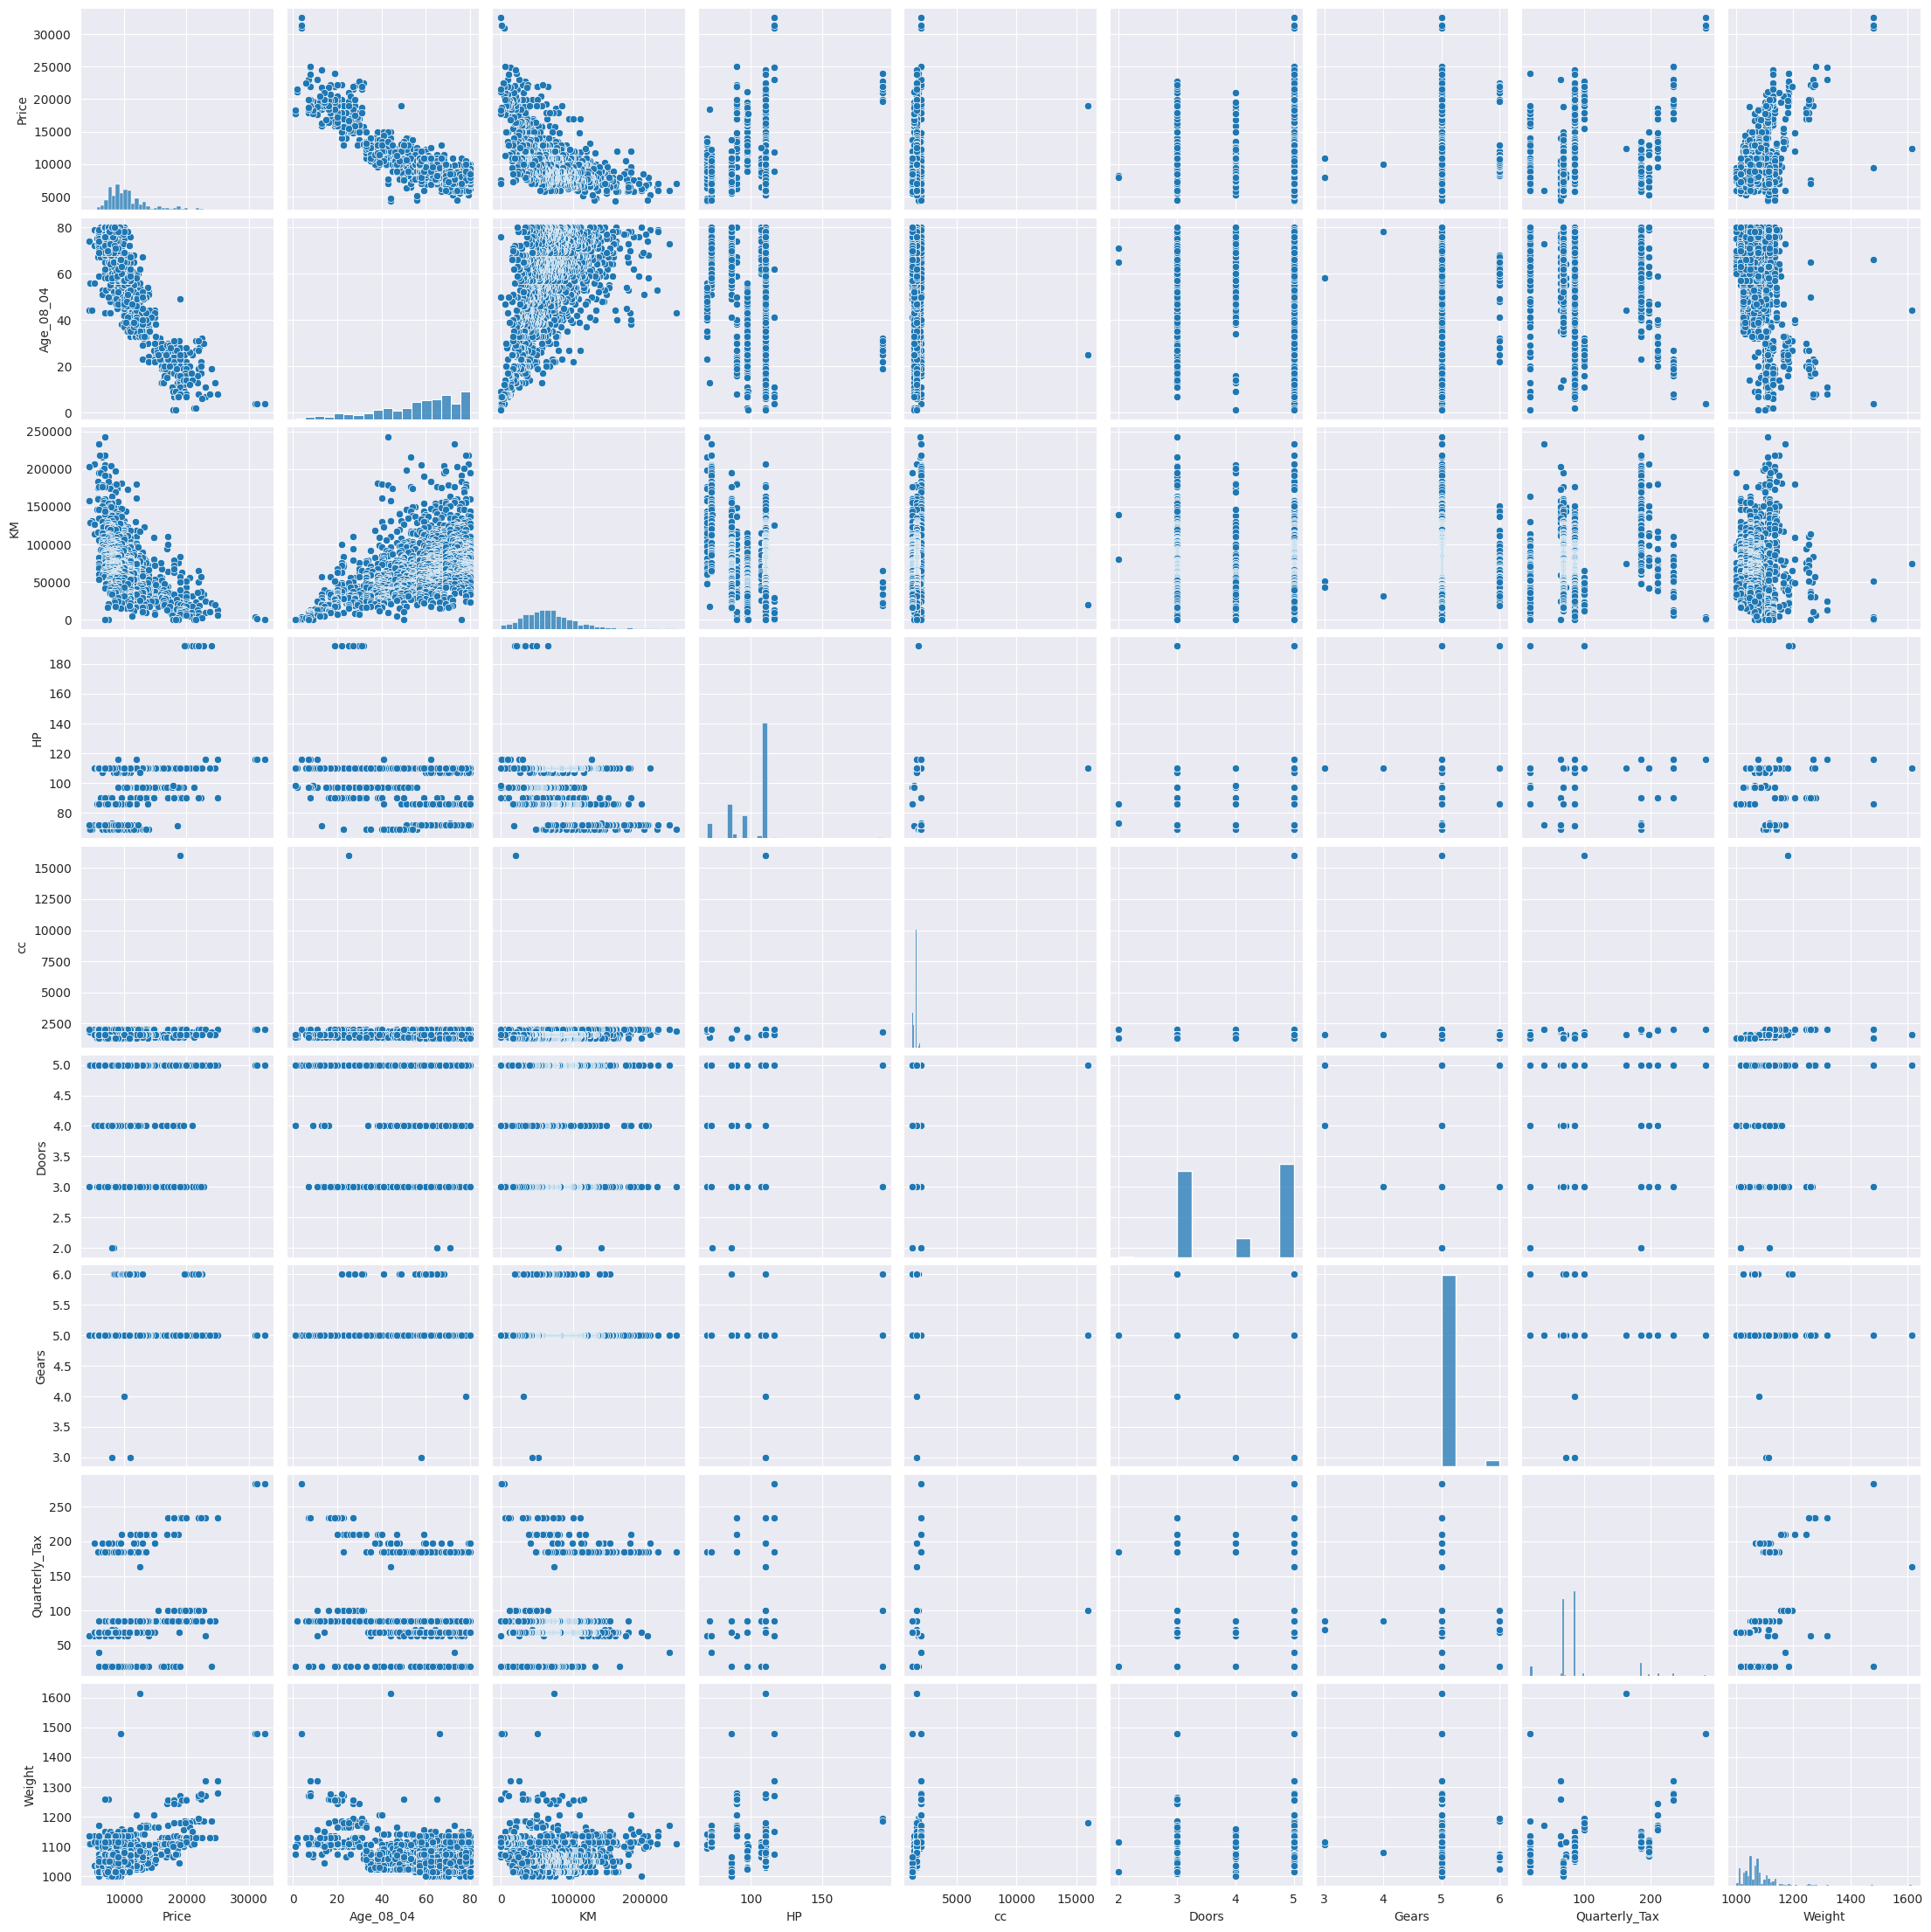

<Figure size 2000x2000 with 0 Axes>

In [225]:
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.figure(figsize=(20,20))

#preparing a model


In [226]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears	+Quarterly_Tax+Weight', data=data).fit()

In [227]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [228]:
print('T values-----------------','\n' ,model.tvalues, '\n' , 'P values-----------------------','\n',model.pvalues)

#check p values all are <0.05, i.e y is dependent on all of them

T values----------------- 
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 P values----------------------- 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [229]:
(model.rsquared, model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

RIDGE REGRESSION/ L2

In [230]:
from sklearn.linear_model import Ridge

In [231]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [232]:
Y=data.iloc[:,0]
Y=pd.DataFrame(Y)
X=data.iloc[:,1:]
X=pd.DataFrame(X)

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test , Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=42)

In [235]:
X_train.shape, X_test.shape,  Y_train.shape, Y_test.shape

((1005, 8), (431, 8), (1005, 1), (431, 1))

In [236]:
from sklearn.linear_model import LinearRegression

# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - Y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_.reshape(-1))
print(lreg_coefficient)


#error is approximately 0 and we an see for age and gear the Beta value is very high.

Mean squared Error on test set :  Price    1.912085e+06
dtype: float64
         Columns  Coefficient Estimate
0      Age_08_04           -120.555217
1             KM             -0.020258
2             HP             29.450158
3             cc             -0.074534
4          Doors             19.345551
5          Gears            576.415075
6  Quarterly_Tax              2.221647
7         Weight             17.666579


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [237]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
clf=Ridge()
param_grid=[{'alpha':[5,10,15,20,25,30]}]
gsv=GridSearchCV(clf,param_grid, cv=5, verbose=300)
gsv.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START alpha=5.....................................................
[CV 1/5; 1/6] END ......................alpha=5;, score=0.832 total time=   0.0s
[CV 2/5; 1/6] START alpha=5.....................................................
[CV 2/5; 1/6] END ......................alpha=5;, score=0.299 total time=   0.0s
[CV 3/5; 1/6] START alpha=5.....................................................
[CV 3/5; 1/6] END ......................alpha=5;, score=0.862 total time=   0.0s
[CV 4/5; 1/6] START alpha=5.....................................................
[CV 4/5; 1/6] END ......................alpha=5;, score=0.870 total time=   0.0s
[CV 5/5; 1/6] START alpha=5.....................................................
[CV 5/5; 1/6] END ......................alpha=5;, score=0.844 total time=   0.0s
[CV 1/5; 2/6] START alpha=10....................................................
[CV 1/5; 2/6] END .....................alpha=10;,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [5, 10, 15, 20, 25, 30]}], verbose=300)

In [238]:
gsv.best_params_, gsv.best_score_

({'alpha': 5}, 0.7413218608158002)

In [317]:
from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=5)
ridgeR.fit(X_train,Y_train)

Ridge(alpha=5)

In [318]:
y_pred_test=ridgeR.predict(X_test)
y_pred_train=ridgeR.predict(X_train)


In [319]:
#let us calculate MSE
mse_ridge_test=np.mean((y_pred_test-Y_test)**2)
mse_ridge_train=np.mean((y_pred_train-Y_train)**2)
print('Test error:  ', mse_ridge_test)
print('Train error: ', mse_ridge_train)

Test error:   Price    1.912480e+06
dtype: float64
Train error:  Price    1.746789e+06
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [320]:
#we can observe that training and testing error is very very low

In [321]:
rige_coefficients=pd.DataFrame()
rige_coefficients['columns']=X_train.columns
rige_coefficients['Coefficient Estimate']=pd.Series(ridgeR.coef_.reshape(-1))

In [322]:
print(rige_coefficients)
#Gears and Age has very high beta values



         columns  Coefficient Estimate
0      Age_08_04           -120.541038
1             KM             -0.020239
2             HP             29.673186
3             cc             -0.074789
4          Doors             16.418567
5          Gears            508.990752
6  Quarterly_Tax              2.242984
7         Weight             17.671076


LASSO

In [311]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 5)
lasso.fit(X_train, Y_train)
y_pred1_test = lasso.predict(X_test)
y_pred1_train= lasso.predict(X_train)


In [312]:
y_pred1_test=y_pred1_test.reshape(-1,1)
y_pred1_train=y_pred1_train.reshape(-1,1)

In [313]:
# calculate mean square error
mean_squared_error_lasso = np.mean((y_pred1_test - Y_test)**2)
print(mean_squared_error_lasso)

Price    1.912580e+06
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [314]:
# calculate mean square error
mean_squared_error_lasso = np.mean((y_pred1_train - Y_train)**2)
print(mean_squared_error_lasso)

Price    1.747365e+06
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [315]:
lasso_coefficients=pd.DataFrame()
lasso_coefficients['columns']=X_train.columns
lasso_coefficients['Coefficient Estimate']=pd.Series(lasso.coef_.reshape(-1))

In [316]:
print(lasso_coefficients)

         columns  Coefficient Estimate
0      Age_08_04           -120.509688
1             KM             -0.020224
2             HP             29.880605
3             cc             -0.075072
4          Doors              7.576233
5          Gears            438.333968
6  Quarterly_Tax              2.237190
7         Weight             17.721327


In [ ]:
#For age the beta value is not decreasing, i.e,it is an importnt parameter
#for gear the beta value seems to be decresed.

ElasticNet

In [326]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .4,l1_ratio=.5)
e_net.fit(X_train, Y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
y_pred_elastc_train=e_net.predict(X_train)


In [330]:
y_pred_elastic=y_pred_elastic.reshape(-1,1
                                      )
y_pred_elastc_train=y_pred_elastc_train.reshape(-1,1)

In [331]:
mean_squared_error = np.mean((y_pred_elastic - Y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set Price    1.919418e+06
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Columns,Coefficient Estimate
0,Age_08_04,-120.346458
1,KM,-0.020155
2,HP,31.021773
3,cc,-0.076309
4,Doors,-0.623713
5,Gears,90.512414
6,Quarterly_Tax,2.379063
7,Weight,17.708890


In [ ]:
#here compared to lasso and ridge, the beta value for Gears has been decreased and in case of Age it is same in all 3 models,
